Problem Statement
As AI-generated content becomes more prevalent, it is increasingly difficult to distinguish between human-written and AI-generated text. This project aims to build a machine learning model that detects AI-generated content based on linguistic, structural, and readability features.

Context
AI-generated writing tools (e.g., ChatGPT, Jasper) are now used in academia, journalism, and business. However, the misuse of such tools—e.g., ghostwriting essays or misinformation—poses challenges. Institutions and platforms need better tools to automatically detect AI-generated text for ethical, security, and authenticity purposes.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
df = pd.read_csv("ai_human_content_detection_dataset.csv")
df.shape

(1367, 17)

In [7]:
df.isnull().sum()

text_content             0
content_type             0
word_count               0
character_count          0
sentence_count           0
lexical_diversity        0
avg_sentence_length      0
avg_word_length          0
punctuation_ratio        0
flesch_reading_ease     79
gunning_fog_index       35
grammar_errors           0
passive_voice_ratio     31
predictability_score     0
burstiness               0
sentiment_score         54
label                    0
dtype: int64

In [9]:
df = df.dropna()
df.shape

(1179, 17)

/var/folders/8v/l804p1v56rg0kxpqswf28qtw0000gn/T/ipykernel_94502/1452513551.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='Set2')


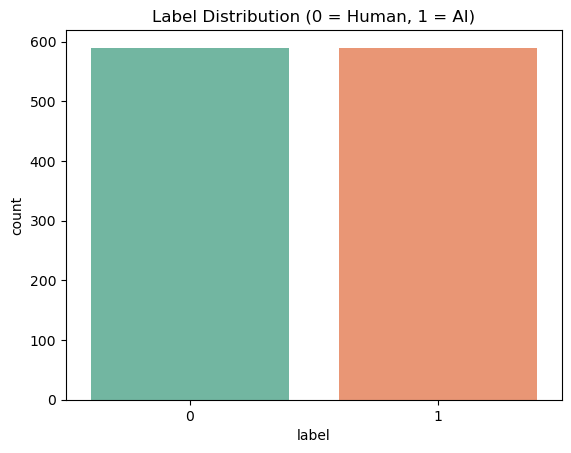

In [11]:
sns.countplot(x='label', data=df, palette='Set2')
plt.title("Label Distribution (0 = Human, 1 = AI)")
plt.show()

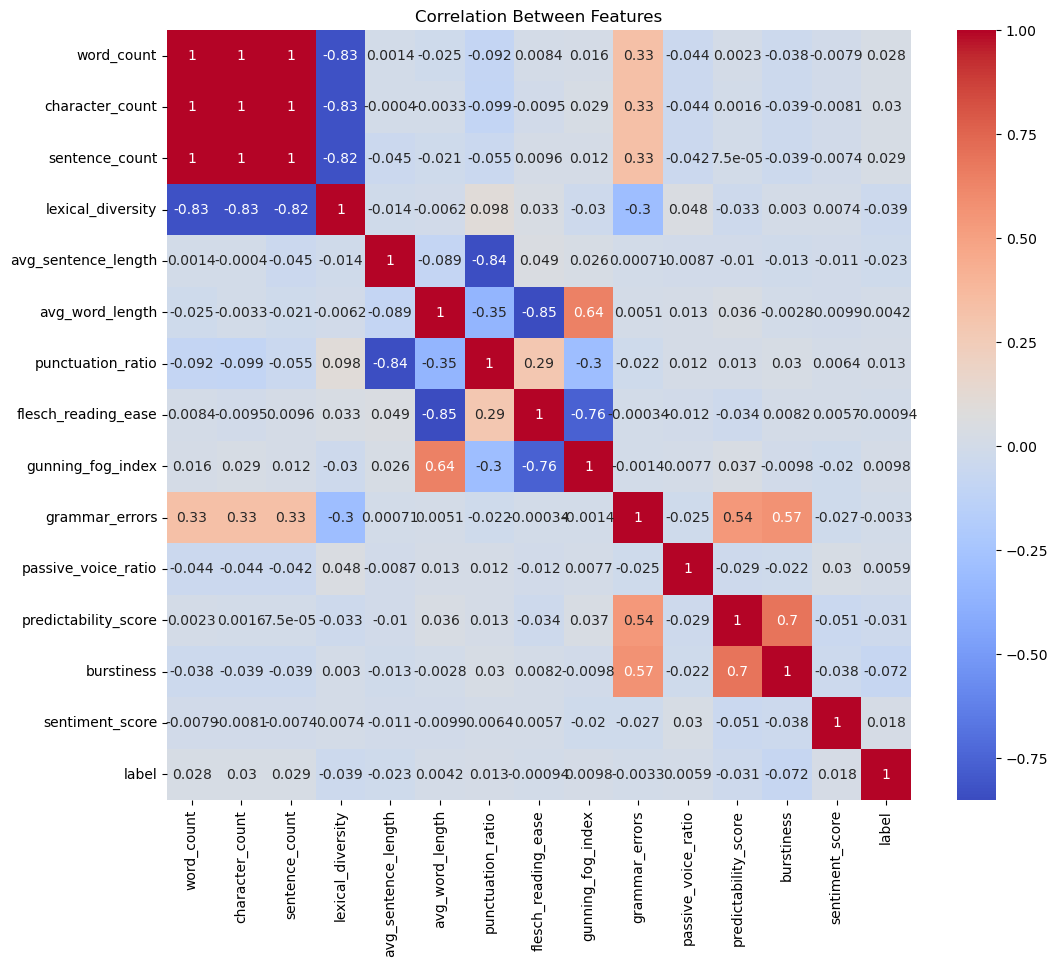

In [13]:
plt.figure(figsize=(12,10))
corr = df.drop(columns=["text_content", "content_type"]).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Between Features")
plt.show()

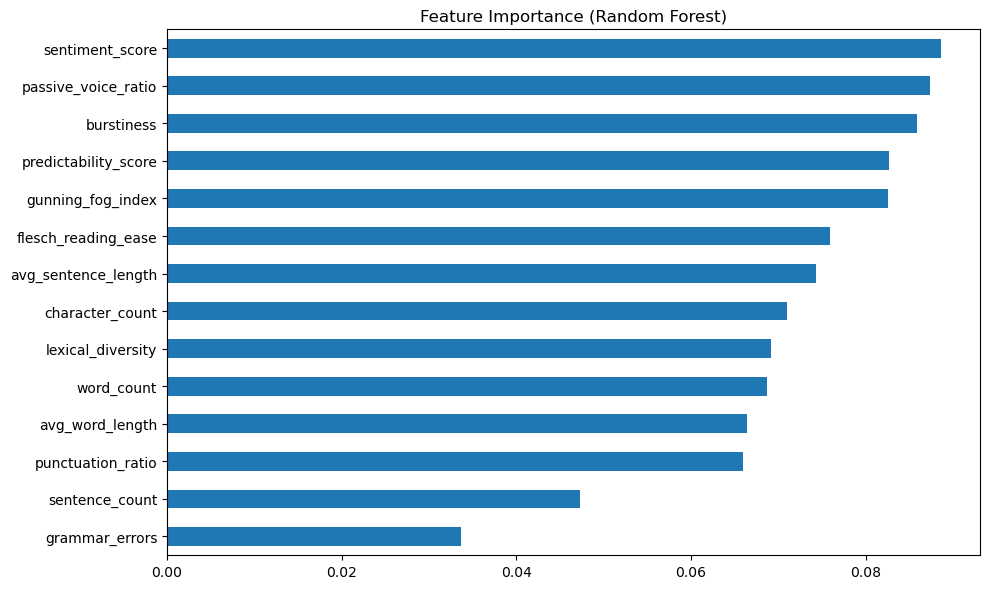

In [15]:
X = df.drop(columns=["text_content", "content_type", "label"])
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind="barh", figsize=(10, 6), title="Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()

In [17]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.50      0.53      0.52       113
           1       0.54      0.51      0.53       123

    accuracy                           0.52       236
   macro avg       0.52      0.52      0.52       236
weighted avg       0.52      0.52      0.52       236

Confusion Matrix:

[[60 53]
 [60 63]]


/Users/judy/Desktop/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
from sklearn.preprocessing import StandardScaler

# Scale your features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the model again
lr = LogisticRegression(max_iter=2000)
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

# Print the new classification report and confusion matrix
print("Classification Report (after scaling):\n")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix (after scaling):")
print(confusion_matrix(y_test, y_pred))

Classification Report (after scaling):

              precision    recall  f1-score   support

           0       0.48      0.55      0.51       113
           1       0.52      0.45      0.48       123

    accuracy                           0.50       236
   macro avg       0.50      0.50      0.50       236
weighted avg       0.50      0.50      0.49       236


Confusion Matrix (after scaling):
[[62 51]
 [68 55]]


In [25]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv("ai_human_content_detection_dataset.csv")
df = df.dropna()

X = df.drop(columns=["text_content", "content_type", "label"])
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    "objective": "binary:logistic",   # for binary classification
    "eval_metric": "logloss",         # evaluation metric
    "seed": 42                         # for reproducibility
}

xgb_model = xgb.train(params, dtrain, num_boost_round=100)

y_pred_proba_xgb = xgb_model.predict(dtest)              
y_pred_xgb = (y_pred_proba_xgb > 0.5).astype(int)

print("Classification Report:\n")
print(classification_report(y_test, y_pred_xgb, target_names=["Human", "AI"]))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_xgb))

Classification Report:

              precision    recall  f1-score   support

       Human       0.47      0.54      0.50       113
          AI       0.51      0.44      0.47       123

    accuracy                           0.49       236
   macro avg       0.49      0.49      0.49       236
weighted avg       0.49      0.49      0.49       236


Confusion Matrix:

[[61 52]
 [69 54]]
